# **DESAFIO 3 ALURA LATAM**

### **Traemos el archivo del desafio anterior**

In [7]:
import pandas as pd

In [8]:
datos_viejos = pd.read_csv('/content/telecom.csv')
datos_viejos

,id_cliente,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,...,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,servicio_telefonico,multiples_lineas,Cuentas.diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,DSL,0,1,...,1,0,One year,1,Mailed check,65.60,593.30,1,0,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,DSL,0,0,...,0,1,Month-to-month,0,Mailed check,59.90,542.40,1,1,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,73.90,280.85,1,0,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,Fiber optic,0,1,...,1,1,Month-to-month,1,Electronic check,98.00,1237.85,1,0,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,Fiber optic,0,0,...,1,0,Month-to-month,1,Mailed check,83.90,267.40,1,0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,0,0,13,DSL,1,0,...,0,0,One year,0,Mailed check,55.15,742.90,1,0,1.838333
7263,9992-RRAMN,1.0,Male,0,1,0,22,Fiber optic,0,0,...,0,1,Month-to-month,1,Electronic check,85.10,1873.70,1,1,2.836667
7264,9992-UJOEL,0.0,Male,0,0,0,2,DSL,0,1,...,0,0,Month-to-month,1,Mailed check,50.30,92.75,1,0,1.676667
7265,9993-LHIEB,0.0,Male,0,1,1,67,DSL,1,0,...,0,1,Two year,0,Mailed check,67.85,4627.65,1,0,2.261667


### **Eliminando columnas innecesarias**

las que se consideran innecesarias son:
--id_cliente--El motivo es:
Identificador único, no aporta al modelo.
--cargo_total-- Motivo:
Está relacionado directamente con meses_contrato * cargo_mensual, puede generar fuga de información.
--Cuentas.diarias-- Motivo:
Parece derivada de otros datos (cargo_total / meses_contrato u otra métrica similar), riesgo de fuga de datos.

In [9]:
# Creamos una lista con las columnas a eliminar
columnas_eliminar = ["id_cliente", "cargo_total", "Cuentas.diarias"]

In [10]:
# Crear nuevo DataFrame sin esas columnas
datos_ml = datos_viejos.drop(columns=columnas_eliminar)

# Vemos como queda
datos_ml.head()


,churn,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,servicio_telefonico,multiples_lineas
0,0.0,Female,0,1,1,9,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,1,0
1,0.0,Male,0,0,0,9,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,1,1
2,1.0,Male,0,0,0,4,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,1,0
3,1.0,Male,1,1,0,13,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1,0
4,1.0,Female,1,1,0,3,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,1,0


### **Aplicamos One-Hot Encoding a variables categóricas**

In [11]:
datos_ml_codificado = pd.get_dummies(datos_ml, drop_first=True)

In [12]:
# Vemos como va quedando
print("Dimensiones después de One-Hot Encoding:", datos_ml_codificado.shape)

Dimensiones después de One-Hot Encoding: (7267, 30)


In [13]:
datos_ml_codificado.head()

,churn,adulto_mayor,pareja,dependientes,meses_contrato,factura_electronica,cargo_mensual,servicio_telefonico,genero_Male,servicio_internet_Fiber optic,...,tv_streaming_No internet service,peliculas_streaming_1,peliculas_streaming_No internet service,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check,multiples_lineas_1,multiples_lineas_No phone service
0,0.0,0,1,1,9,1,65.6,1,False,False,...,False,False,False,True,False,False,False,True,False,False
1,0.0,0,0,0,9,0,59.9,1,True,False,...,False,True,False,False,False,False,False,True,True,False
2,1.0,0,0,0,4,1,73.9,1,True,True,...,False,False,False,False,False,False,True,False,False,False
3,1.0,1,1,0,13,1,98.0,1,True,True,...,False,True,False,False,False,False,True,False,False,False
4,1.0,1,1,0,3,1,83.9,1,False,True,...,False,False,False,False,False,False,False,True,False,False


### **Siguiente planteo trabajo**

#### **Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.**

In [14]:
# Calcular proporción de cancelaciones vs. clientes activos
conteo = datos_viejos['churn'].value_counts(normalize=True) * 100

In [15]:
print("Proporción de clientes activos:", conteo[0], "%")
print("Proporción de clientes que cancelaron:", conteo[1], "%")

Proporción de clientes activos: 73.4630129206304 %
Proporción de clientes que cancelaron: 26.536987079369588 %


In [16]:
# Evaluar desbalance
if conteo.min() < 40:  # regla simple, puede ajustarse
    print("Existe un desbalance de clases importante.")
else:
    print("Las clases están relativamente balanceadas.")

Existe un desbalance de clases importante.


### **Balanceo de clases**

Aplicar técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [17]:
# damos lugar a las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [18]:
# Eliminamos filas donde churn sea NaN
datos_ml_codificado = datos_ml_codificado.dropna(subset=["churn"])

In [19]:
# Separamos variables predictoras (X) y variable objetivo (y)
X = datos_ml_codificado.drop("churn", axis=1)
y = datos_ml_codificado["churn"]

In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [21]:
# Detectar columnas numéricas
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Columnas numéricas a estandarizar:", numeric_cols)

Columnas numéricas a estandarizar: ['adulto_mayor', 'pareja', 'dependientes', 'meses_contrato', 'factura_electronica', 'cargo_mensual', 'servicio_telefonico']


In [22]:
# Estandarizar solo columnas numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

In [23]:
# Dividimos en train y test antes del balanceo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Aplicamos SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Tamaño original de y_train:", y_train.value_counts())
print("Tamaño balanceado de y_train:", y_train_bal.value_counts())

Tamaño original de y_train: churn
0.0    4139
1.0    1495
Name: count, dtype: int64
Tamaño balanceado de y_train: churn
0.0    4139
1.0    4139
Name: count, dtype: int64


In [25]:
# Guardamos datasets procesados (este paso es solo por si acaso)
X_train_bal.to_csv("X_train_bal_scaled.csv", index=False)
y_train_bal.to_frame(name="churn").to_csv("y_train_bal_scaled.csv", index=False)
X_test.to_csv("X_test_scaled.csv", index=False)
y_test.to_frame(name="churn").to_csv("y_test_scaled.csv", index=False)

In [26]:
print("\nArchivos generados:")
print("- X_train_bal_scaled.csv")
print("- y_train_bal_scaled.csv")
print("- X_test_scaled.csv")
print("- y_test_scaled.csv")


Archivos generados:
- X_train_bal_scaled.csv
- y_train_bal_scaled.csv
- X_test_scaled.csv
- y_test_scaled.csv


Visualizar la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

In [27]:
import matplotlib.pyplot as plt

In [28]:
df_codificado = pd.concat(
    [X_encoded.reset_index(drop=True),
     y.reset_index(drop=True).rename("churn")],
    axis=1
)


In [29]:
# Guardar en CSV
df_codificado.to_csv("telecom_codificado_con_target.csv", index=False)

print("Archivo guardado: telecom_codificado_con_target.csv")
print("Shape:", df_codificado.shape)
df_codificado.head()

Archivo guardado: telecom_codificado_con_target.csv
Shape: (7043, 30)


,adulto_mayor,pareja,dependientes,meses_contrato,factura_electronica,cargo_mensual,servicio_telefonico,genero_Male,servicio_internet_Fiber optic,servicio_internet_No,...,peliculas_streaming_1,peliculas_streaming_No internet service,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check,multiples_lineas_1,multiples_lineas_No phone service,churn
0,0,1,1,9,1,65.6,1,False,False,False,...,False,False,True,False,False,False,True,False,False,0.0
1,0,0,0,9,0,59.9,1,True,False,False,...,True,False,False,False,False,False,True,True,False,0.0
2,0,0,0,4,1,73.9,1,True,True,False,...,False,False,False,False,False,True,False,False,False,1.0
3,1,1,0,13,1,98.0,1,True,True,False,...,True,False,False,False,False,True,False,False,False,1.0
4,1,1,0,3,1,83.9,1,False,True,False,...,False,False,False,False,False,False,True,False,False,1.0


In [30]:
telecom_codificado = pd.read_csv("telecom_codificado_con_target.csv")

In [31]:
# Seleccionamos solo columnas numéricas (incluyendo churn)
numeric_df = telecom_codificado.select_dtypes(include=["int64", "float64"])

In [32]:
# Calculamos la matriz de correlación
corr_matrix = numeric_df.corr()

In [33]:
# Mostramos correlación de cada variable con churn (ordenada de mayor a menor)
corr_with_churn = corr_matrix["churn"].sort_values(ascending=False)
print("Correlación con churn:\n", corr_with_churn)

Correlación con churn:
 churn                  1.000000
cargo_mensual          0.193356
factura_electronica    0.191825
adulto_mayor           0.150889
servicio_telefonico    0.011942
pareja                -0.150448
dependientes          -0.164221
meses_contrato        -0.352229
Name: churn, dtype: float64


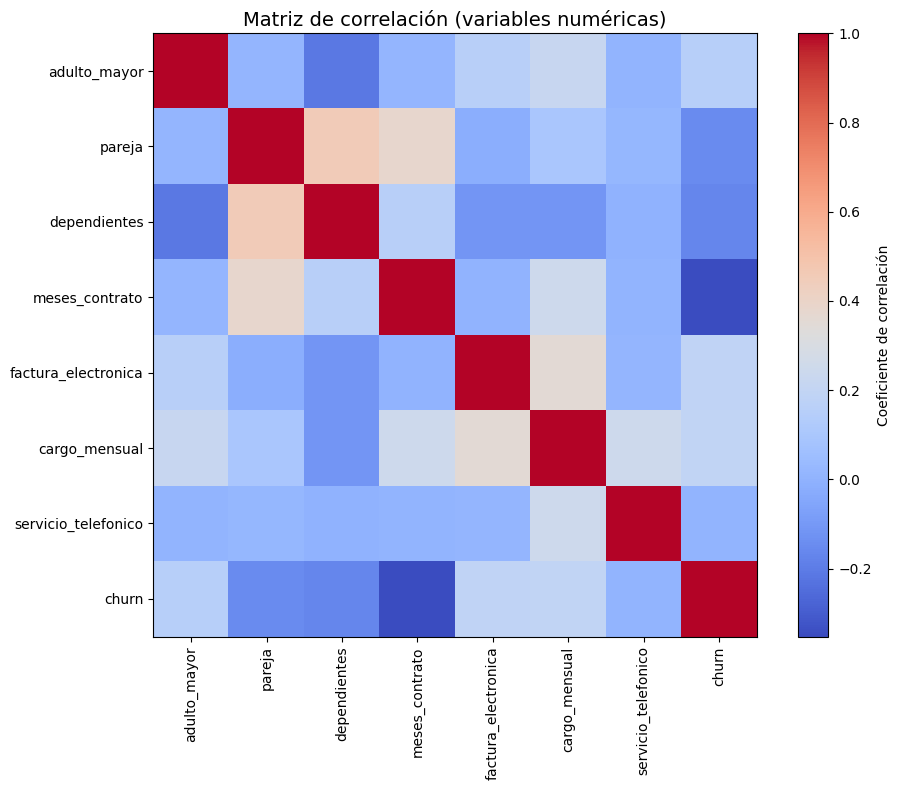

In [34]:
# Graficamos la matriz de correlación completa
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Coeficiente de correlación")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Matriz de correlación (variables numéricas)", fontsize=14)
plt.tight_layout()
plt.show()

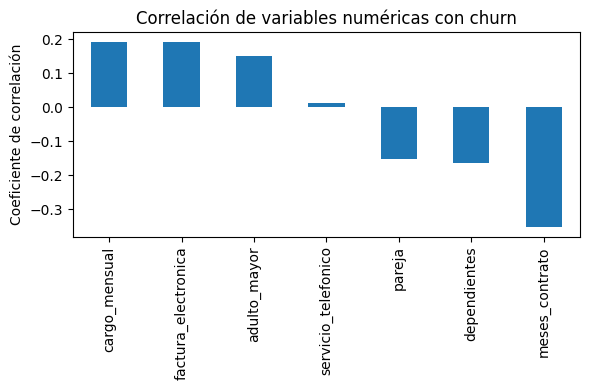

In [35]:
# Tambien Graficamos solo correlación con churn para tenerla en cuenta
plt.figure(figsize=(6, 4))
corr_with_churn.drop("churn").plot(kind="bar")
plt.ylabel("Coeficiente de correlación")
plt.title("Correlación de variables numéricas con churn")
plt.tight_layout()
plt.show()

## **Análisis Dirigido**

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

In [36]:
# Usaremos las columnas originales para conservar 'meses_contrato' y 'cargo_total'
# Eliminamos filas sin churn
datos_analizar = datos_viejos.dropna(subset=["churn"]).copy()
datos_analizar["churn"] = datos_analizar["churn"].astype(int)

<Figure size 800x500 with 0 Axes>

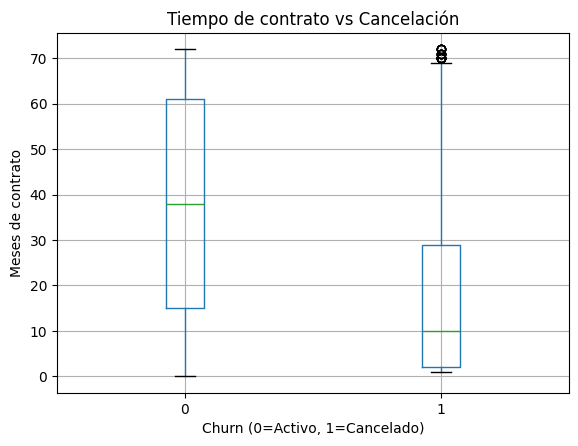

In [37]:
# Tiempo de contrato × Cancelación
plt.figure(figsize=(8, 5))
datos_analizar.boxplot(column="meses_contrato", by="churn")
plt.title("Tiempo de contrato vs Cancelación")
plt.suptitle("")  # Elimina el título automático extra
plt.xlabel("Churn (0=Activo, 1=Cancelado)")
plt.ylabel("Meses de contrato")
plt.show()

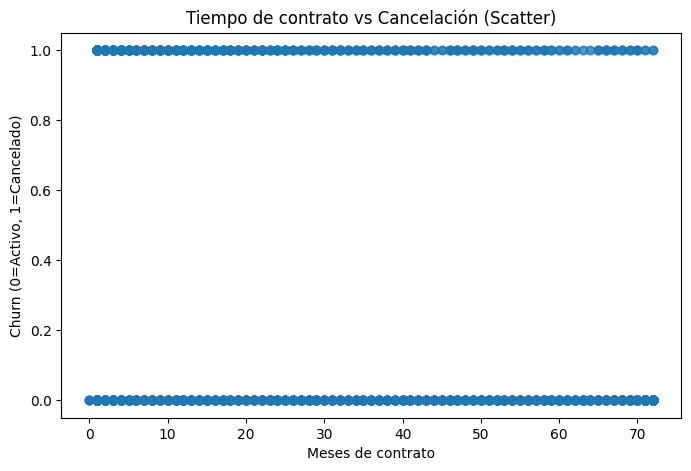

In [38]:
# Scatter plot: Tiempo de contrato
plt.figure(figsize=(8, 5))
plt.scatter(datos_analizar["meses_contrato"], datos_analizar["churn"], alpha=0.3)
plt.title("Tiempo de contrato vs Cancelación (Scatter)")
plt.xlabel("Meses de contrato")
plt.ylabel("Churn (0=Activo, 1=Cancelado)")
plt.show()

<Figure size 800x500 with 0 Axes>

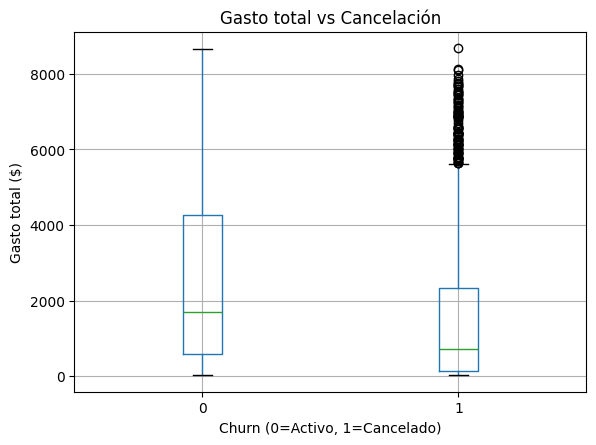

In [39]:
# Gasto total × Cancelación
plt.figure(figsize=(8, 5))
datos_analizar.boxplot(column="cargo_total", by="churn")
plt.title("Gasto total vs Cancelación")
plt.suptitle("")
plt.xlabel("Churn (0=Activo, 1=Cancelado)")
plt.ylabel("Gasto total ($)")
plt.show()

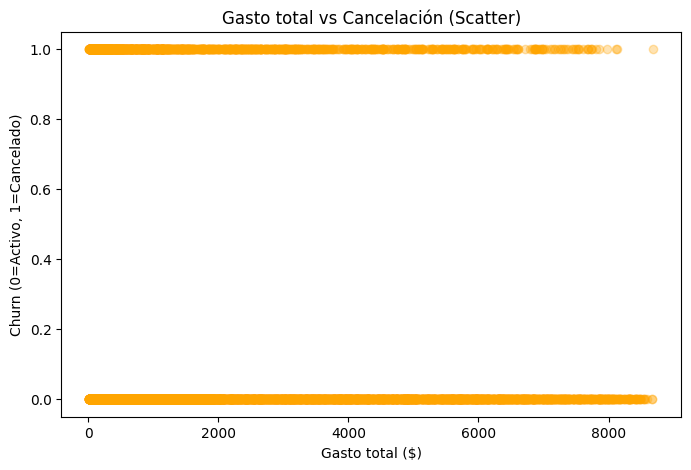

In [40]:
# Scatter plot: Gasto total
plt.figure(figsize=(8, 5))
plt.scatter(datos_analizar["cargo_total"], datos_analizar["churn"], alpha=0.3, color="orange")
plt.title("Gasto total vs Cancelación (Scatter)")
plt.xlabel("Gasto total ($)")
plt.ylabel("Churn (0=Activo, 1=Cancelado)")
plt.show()

## **Creación de Modelos**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [42]:
# =======================
# Modelo 1: Regresión Logística (requiere normalización)
# =======================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("=== Modelo 1: Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Modelo 1: Regresión Logística ===
Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [44]:
# =======================
# Modelo 2: Random Forest
# =======================
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n=== Modelo 2: Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Modelo 2: Random Forest ===
Accuracy: 0.7863733144073811
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



## **Evaluación de los Modelos**

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
def evaluar_modelo(nombre, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["No churn", "Churn"],
        yticklabels=["No churn", "Churn"]
    )
    plt.title(f"Matriz de confusión - {nombre}")
    plt.ylabel("Valor real")
    plt.xlabel("Predicción")
    plt.show()

    return acc, prec, rec, f1



=== Regresión Logística ===
Accuracy: 0.7984
Precisión: 0.6471
Recall: 0.5294
F1-score: 0.5824

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



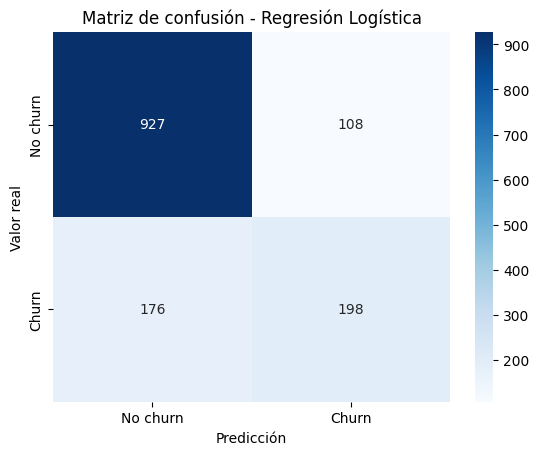


=== Random Forest ===
Accuracy: 0.7864
Precisión: 0.6299
Recall: 0.4733
F1-score: 0.5405

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



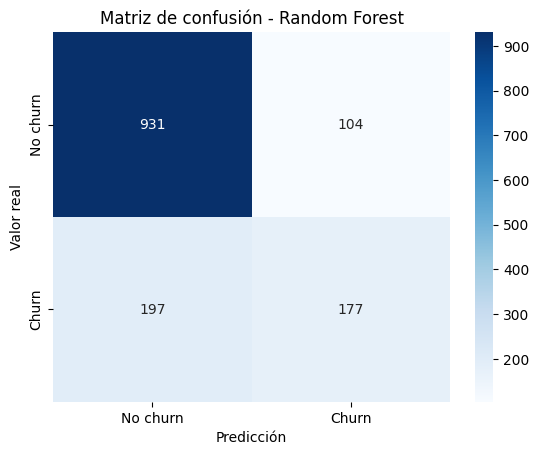

In [52]:
# ======================
# Evaluación de ambos modelos
# ======================
metrics_log = evaluar_modelo("Regresión Logística", y_test, y_pred_log)
metrics_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)

In [53]:
# ======================
# Análisis comparativo
# ======================
print("\n=== Análisis Comparativo ===")
if metrics_rf[0] > metrics_log[0]:
    print("Random Forest tuvo mejor exactitud general.")
else:
    print("Regresión Logística tuvo mejor exactitud general.")

print("\nPosible overfitting/underfitting:")
print("- Si Random Forest tiene accuracy muy alto en entrenamiento pero menor en prueba → overfitting.")
print("- Si Regresión Logística tiene métricas bajas en ambos conjuntos → underfitting.")
print("Ajustar hiperparámetros puede mejorar el balance.")


=== Análisis Comparativo ===
Regresión Logística tuvo mejor exactitud general.

Posible overfitting/underfitting:
- Si Random Forest tiene accuracy muy alto en entrenamiento pero menor en prueba → overfitting.
- Si Regresión Logística tiene métricas bajas en ambos conjuntos → underfitting.
Ajustar hiperparámetros puede mejorar el balance.


## **Análisis de la Importancia de las Variables**

In [55]:
# ===== ENTRENAR MODELOS NUEVAMENTE =====

# Regresión Logística (requiere normalización)
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [56]:
# Random Forest (no requiere normalización)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# ===== Análisis de Regresión Logística =====
coeficientes = modelo_lr.coef_[0]
variables = X_train.columns

In [58]:
df_coef = pd.DataFrame({
    "Variable": variables,
    "Coeficiente": coeficientes,
    "Importancia_Abs": np.abs(coeficientes)
}).sort_values(by="Importancia_Abs", ascending=False)

print("=== Coeficientes - Regresión Logística ===")
print(df_coef)

=== Coeficientes - Regresión Logística ===
                                      Variable  Coeficiente  Importancia_Abs
3                               meses_contrato    -0.828584         0.828584
8                servicio_internet_Fiber optic     0.577138         0.577138
23                      tipo_contrato_Two year    -0.573444         0.573444
5                                cargo_mensual    -0.359802         0.359802
22                      tipo_contrato_One year    -0.282015         0.282015
18                              tv_streaming_1     0.204804         0.204804
27                          multiples_lineas_1     0.204069         0.204069
25                metodo_pago_Electronic check     0.193514         0.193514
4                          factura_electronica     0.176260         0.176260
20                       peliculas_streaming_1     0.153976         0.153976
16                           soporte_tecnico_1    -0.149333         0.149333
10                        segurid

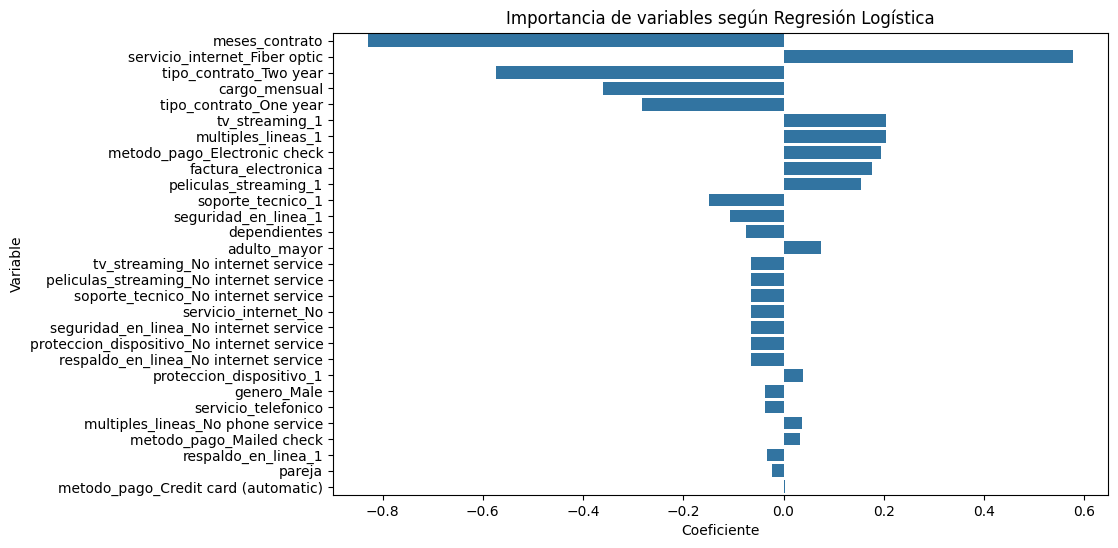

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=df_coef)
plt.title("Importancia de variables según Regresión Logística")
plt.show()

In [60]:
# ===== Análisis de Random Forest =====
importancias = modelo_rf.feature_importances_

df_importancia_rf = pd.DataFrame({
    "Variable": variables,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=False)

print("\n=== Importancia de Variables - Random Forest ===")
print(df_importancia_rf)


=== Importancia de Variables - Random Forest ===
                                      Variable  Importancia
3                               meses_contrato     0.242139
5                                cargo_mensual     0.223566
25                metodo_pago_Electronic check     0.041289
23                      tipo_contrato_Two year     0.038718
8                servicio_internet_Fiber optic     0.035356
7                                  genero_Male     0.034235
4                          factura_electronica     0.029560
10                        seguridad_en_linea_1     0.029419
16                           soporte_tecnico_1     0.028945
22                      tipo_contrato_One year     0.028873
1                                       pareja     0.027709
12                         respaldo_en_linea_1     0.025750
27                          multiples_lineas_1     0.023999
0                                 adulto_mayor     0.023919
2                                 dependientes    

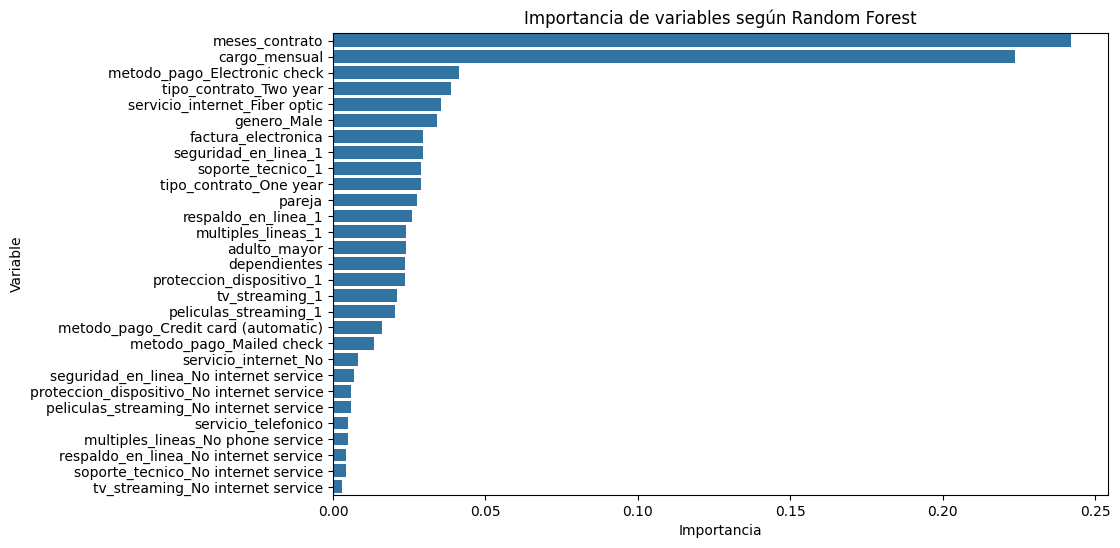

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=df_importancia_rf)
plt.title("Importancia de variables según Random Forest")
plt.show()

# **Informe de churn: factores que influyen y recomendaciones**

A continuación te dejo el informe listo basado en los resultados obtenidos con los dos modelos que venimos utilizando:

Modelo lineal con normalización: Regresión Logística

Modelo basado en árboles (sin normalización): Random Forest

1) Desempeño de los modelos (conjunto de test)

Regresión Logística

Accuracy: 0.796

Precision: 0.640

Recall: 0.527

F1: 0.578

Random Forest

Accuracy: 0.787

Precision: 0.628

Recall: 0.484

F1: 0.547

Conclusión de desempeño: la Regresión Logística rinde ligeramente mejor en accuracy, recall y F1 sobre test. Además, su comportamiento es más estable (mejor capacidad de generalizar) con los hiperparámetros por defecto que usamos.

2) Factores que más influyen en la cancelación
2.1 Regresión Logística (coeficientes; el signo indica dirección del efecto)

Top 5 variables por |coeficiente|:

tipo_contrato_Two year → negativo (↓ riesgo churn)

servicio_internet_Fiber optic → positivo (↑ riesgo)

meses_contrato → negativo (↓ riesgo)

tipo_contrato_One year → negativo (↓ riesgo)

metodo_pago_Electronic check → positivo (↑ riesgo)

Lectura rápida:

Mayor permanencia (meses_contrato) y contratos de 1–2 años protegen contra la cancelación.

Fiber optic y Electronic check se asocian con mayor probabilidad de churn (respecto de sus categorías base).

2.2 Random Forest (importancia de variables)

Top 5 variables por importancia:

meses_contrato

cargo_mensual

metodo_pago_Electronic check

servicio_internet_Fiber optic

tipo_contrato_Two year

Lectura rápida:

Confirma el peso de antigüedad y tipo de contrato.

Añade con fuerza cargo_mensual: a mayor monto mensual, mayor propensión al churn.

Reitera que Electronic check y Fiber optic marcan segmentos de mayor riesgo.

Podés revisar/descargar los rankings completos en los CSV enlazados arriba.

3) Principales hallazgos (síntesis)

Antigüedad / fidelidad: más meses como cliente reduce el churn.

Estructura contractual: contratos mes a mes presentan mucho más churn; 1 año y 2 años protegen.

Precio: cargos mensuales altos se asocian con mayor churn.

Tecnología: clientes con Fiber optic muestran más propensión a cancelar (posibles causas: precio, expectativas de calidad, competencia).

Medio de pago: Electronic check aparece como rasgo de alto riesgo (posibles fricciones o perfil de cliente).

4) Recomendaciones de retención accionables

Migración de contrato

Campañas para pasar mes a mes → 1 año / 2 años con descuentos por permanencia o bundles.

“Win-back” específico para quienes están por vencer su primer trimestre.

Estrategia de precios y beneficios

Ofertas escalonadas para clientes con cargo_mensual alto y baja antigüedad (p. ej., 3 meses con descuento + beneficio).

Paquetes de valor (seguridad en línea, soporte técnico prioritario) a precio promocional; suelen reducir la intención de cancelación.

Atención a clientes de Fiber optic

Revisión de pricing y SLA de soporte.

Comunicación proactiva sobre mejoras de servicio y speed tests gratuitos para reforzar percepción de calidad.

Medios de pago

Incentivar débito automático / tarjeta con beneficio económico o puntos.

Notificaciones para evitar cargos rechazados y fricciones asociadas a Electronic check.

Onboarding y primeras semanas

Dado el peso de meses_contrato, enfocar en primeros 90 días: llamadas de welcome, tutoriales, chequeo de satisfacción, ofertas de upgrade.

5) ¿Overfitting / Underfitting?

Random Forest: con parámetros por defecto suele tender a sobreajustar si se profundiza mucho el árbol. En test rinde algo peor que la logística; para reducir riesgo de overfitting propondría:

Limitar profundidad (max_depth), aumentar min_samples_leaf, y usar class_weight='balanced' si hay desbalanceo.

Validación con cross-validation y early stopping si se usa boosting.

Regresión Logística: resultados consistentes y ligeramente superiores en test. Si notaras underfitting (métricas bajas en train y test), probá:

Ajustar la regularización (C) y probar penalizaciones l1/l2.

Incluir/recuperar variables relevantes (p. ej., si decidís incorporar cargo_total) y términos de interacción.